In [3]:
import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from ipywidgets import FileUpload
import io
import sys


In [7]:
# This is the uploader widget


def upload():

    text_file = FileUpload()

    def cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data[0].decode('utf-8'))
       # filename = change['owner'].filename
       # print('Uploaded `{}` ({:.2f} kB)'.format(
        #    filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    text_file.observe(cb, names='data')
    display(text_file)

upload()


FileUpload(value={}, description='Upload')

In [40]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()`[]{};:"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "in", "into", "up", "down", "out", "on", "for", "of", "and", "or", "an", "as", "i", "im", "iam", "are", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "hes", "she", "shes", "him", "his", "her", "hers", "its", "they", "them","us", \
    "their", "what", "which", "who", "whom", "this", "that", "then", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "can", "cant", "could", "would", "must", "may", "do", "does", "did", "dont", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "back", "even", "few", "only", "about", "one", "more", "some", "such", "no", "nor", "not", "too", "so", "very", "can", "will", "just"]
    
    d = {}
    
    for i in punctuations:
        file_contents = file_contents.replace(i,'')
    
    for i in file_contents.split():
        i = i.lower()
        if i in uninteresting_words:
            pass
        else:
            if i not in d:
                d[i]=0
            d[i]+=1   
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(d)
    print('Word count: ', len(d))
#    print(d)
    return cloud.to_array()

Word count:  7642


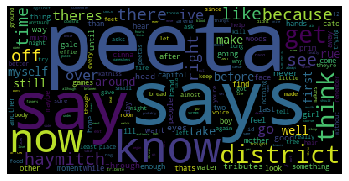

In [41]:
# Display wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()